<center>
    <h1>
    Fashion MNIST
    </h1>
</center
<br>
<br>
<br>
<img src="./dataset-cover.png" width="100%" />

##### Context
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

##### Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

##### Label | Class

0 | T-shirt/top

1 | Trouser

2 | Pullover

3 | Dress

4 | Coat

5 | Sandal

6 | Shirt

7 | Sneaker

8 | Bag

9 | Ankle boot


## Libraries Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

import warnings
warnings.filterwarnings('ignore')

## Data Import

In [2]:
train_df = pd.read_csv("./fashion-mnist_train.csv")
test_df = pd.read_csv("./fashion-mnist_test.csv")

## Exploring the Data

In [3]:
print("Train dataframe size:" , train_df.shape)
print("Test dataframe size: " , test_df.shape)

Train dataframe size: (60000, 785)
Test dataframe size:  (10000, 785)


In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Excluding 'label' column, we can see we have 784 features for each image. Each, describing one pixel.

#  Modeling without Dimensionality Reduction

As a point of refrence, we will first model witout dimensionality reduction so we can later compare the diffrences.

## Splitting the Data

In [5]:
y = train_df.label
X = train_df.drop("label",axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Modeling with different classifiers

### KNeighborsClassifier

In [6]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print("The KNN model score is: {:.2f}%".format(knn.score(X_test, y_test)*100))

The KNN model score is: 85.58%


### DecisionTreeClassifier

In [7]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test, y_test)
print("The DT model score is: {:.2f}%".format(dt.score(X_test, y_test)*100))

The DT model score is: 79.21%


### *--Ensamble models--*

### RandomForestClassifier

In [8]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test, y_test)
print("The RFC model score is: {:.2f}%".format(rfc.score(X_test, y_test)*100))

The RFC model score is: 87.86%


### *--Scores Overview Table--*

To get a clear overview, let's put it all in a summery table:

In [9]:
scores = [
    knn.score(X_test, y_test) * 100,
    dt.score(X_test, y_test) * 100,
    rfc.score(X_test, y_test) * 100,
]
scores_df = pd.DataFrame(
    data=scores,
    columns=["Score"],
    index=[
        "KNeighborsClassifier",
        "DecisionTreeClassifier",
        "RandomForestClassifier",
    ],
)
scores_df

,Score
KNeighborsClassifier,85.583333
DecisionTreeClassifier,79.208333
RandomForestClassifier,87.858333


#  Modeling with Dimensionality Reduction

## Dimensionality Reduction

Even tough we got nice result's, we might get same or even better results with with less complexed model, which means a lighter, and more accurate model for us.

So let's look for a combination of features that capture well the variance of the original features. 
To do so, we can first look at the explained variance as a function of the number of dimensions:

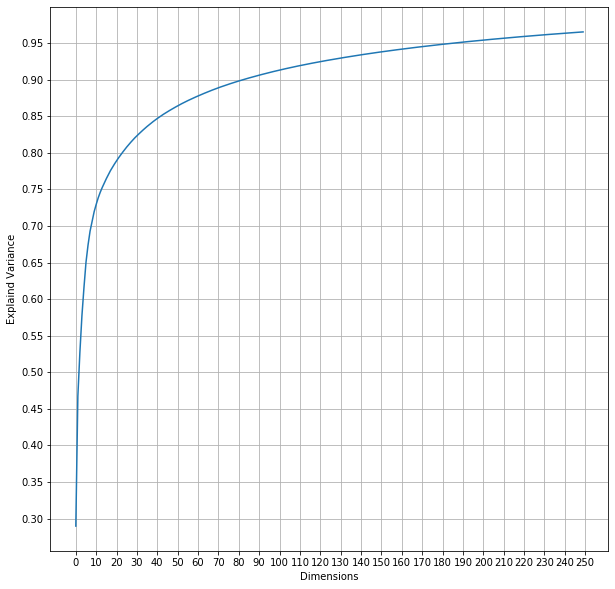

In [10]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_[:250])

plt.figure(figsize=(10,10))
plt.plot(cumsum)
plt.xlabel("Dimensions")
plt.ylabel("Explaind Variance")
plt.grid(True)
plt.xticks(range(0,260,10))
plt.yticks(np.arange(0.3,1.0,0.05))
plt.show()

As we can see in the graph, to capture the majority of the variance we with minimum features between 30 to 40 dimensions. To not lose to mush of the variance, we will go with 36 dimensions.

First, let's see a sample of the images before the dimensionality reduction:

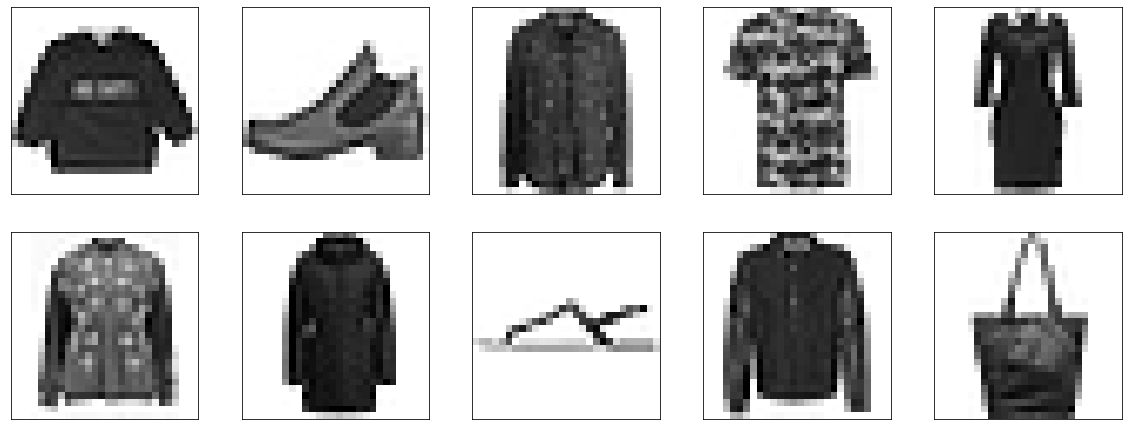

In [11]:
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(train_df.drop(['label'],axis=1).iloc[i, :]).reshape(28,28), cmap=plt.cm.binary)

And now, let's reduce and show the reduced images:

In [12]:
pca= PCA(n_components=36)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

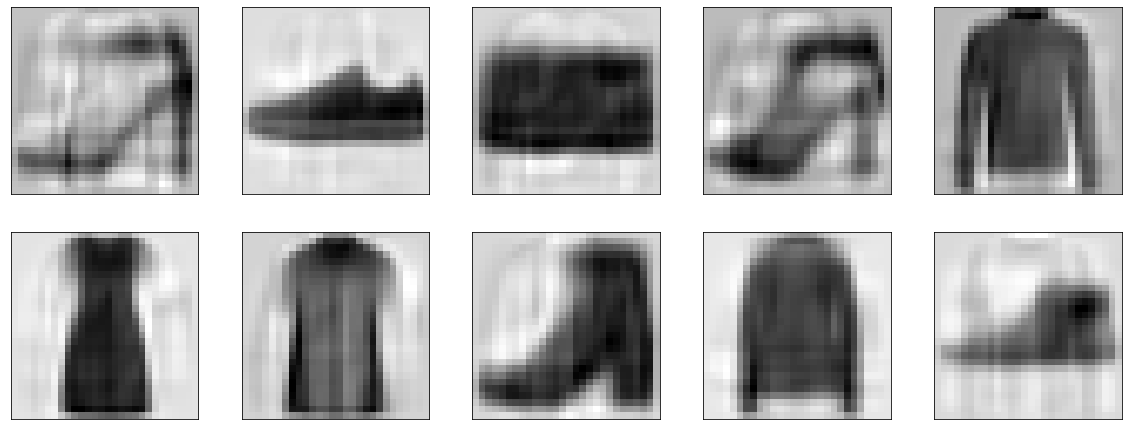

In [13]:
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
#     print(X_reduced[i].shape)
    plt.imshow(X_recovered[i].reshape(28,28),cmap=plt.cm.binary)

The reduced images are still somewhat recognizable, we can defenietly move on.

## Splitting the Data

In [14]:
y_pca = train_df.label
X_pca = train_df.drop("label",axis=1)

X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

##  Modeling with different classifiers

### KNeighborsClassifier

In [15]:
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_pca_train,y_pca_train)
print("The KNN model score is: {:.2f}%".format(knn_pca.score(X_pca_test, y_pca_test)*100))

The KNN model score is: 85.58%


### DecisionTreeClassifier

In [16]:
dt_pca = DecisionTreeClassifier()
dt_pca.fit(X_pca_train,y_pca_train)
dt.score(X_pca_test, y_pca_test)
print("The DT model score is: {:.2f}%".format(dt_pca.score(X_pca_test, y_pca_test)*100))

The DT model score is: 78.96%


### *--Ensamble models--*

### RandomForestClassifier

In [17]:
rfc_pca = RandomForestClassifier()
rfc_pca.fit(X_pca_train,y_pca_train)
rfc_pca.score(X_pca_test, y_pca_test)
print("The RFC model score is: {:.2f}%".format(rfc_pca.score(X_pca_test, y_pca_test)*100))

The RFC model score is: 87.81%


### GradientBoostingClassifier

In [18]:
# gb_pca = GradientBoostingClassifier()
# gb_pca.fit(X_pca_train,y_pca_train)
# gb_pca.score(X_pca_test, y_pca_test)
# print("The GB model score is: {:.2f}%".format(gb_pca.score(X_pca_test, y_pca_test)*100))

### AdaBoostClassifier

In [20]:
adb_pca = AdaBoostClassifier()
adb_pca.fit(X_pca_train,y_pca_train)
adb_pca.score(X_pca_test, y_pca_test)
print("The ADB model score is: {:.2f}%".format(adb_pca.score(X_pca_test, y_pca_test)*100))

The GB model score is: 55.22%


### XGBClassifier

In [23]:
from xgboost import XGBClassifier
xgb_pca = XGBClassifier()
xgb_pca.fit(X_pca_train,y_pca_train)
xgb_pca.score(X_pca_test, y_pca_test)
print("The XGB model score is: {:.2f}%".format(xgb_pca.score(X_pca_test, y_pca_test)*100))

The XGB model score is: 86.42%


### *--Scores Overview Table--*

To get a clear overview, let's put it all in a summery table:

In [25]:
scores_pca = [
    knn_pca.score(X_pca_test, y_pca_test) * 100,
    dt_pca.score(X_pca_test, y_pca_test) * 100,
    rfc_pca.score(X_pca_test, y_pca_test) * 100,
#     gb_pca.score(x_pca_test, y_pca_test) * 100,
    adb_pca.score(X_pca_test, y_pca_test) * 100,
    xgb_pca.score(X_pca_test, y_pca_test) * 100,
]
scores_pca_df = pd.DataFrame(
    data=scores_pca,
    columns=["PCA Score"],
    index=[
        "KNeighborsClassifier",
        "DecisionTreeClassifier",
        "RandomForestClassifier",
#         "GradientBoostingClassifier",
        "AdaBoostClassifier",
        "XGBClassifier",
    ],
)
scores_pca_df

,PCA Score
KNeighborsClassifier,85.583333
DecisionTreeClassifier,78.958333
RandomForestClassifier,87.808333
AdaBoostClassifier,55.216667
XGBClassifier,86.425000


# Conclusion

Looking at the Scores Table and the PCA Scores Table, even we would expect to maybe get the best results from the more "modern" models like XGBoost, actually, the best results were using the RandomForestClassifier model.

But the truly shocking fact is that it got similar results to using the full 784 dimensions, but using only 36 of them - meaning after reducing the dimensions by the PCA in __95__ precent!!

To finish, using the RandomForestClassifier model and PCA method, let's predict on our test data and put it in a clear confusion matrix and classification report:

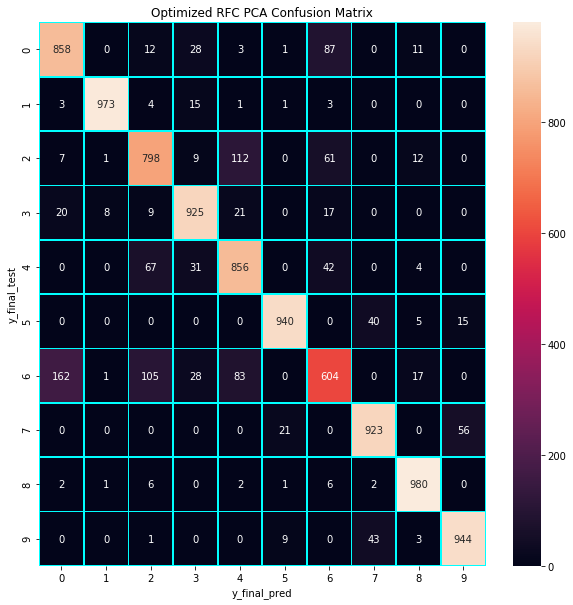

In [37]:
#now let's predict on the test data
y_final_test = test_df.label
X_final_test= test_df.drop("label",axis=1)
y_final_pred = rfc_pca.predict(X_final_test)

# Creating the confusion matrix:
rfc_pca_cm = confusion_matrix(y_final_test, y_final_pred)

# Visualization:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(rfc_pca_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax)
plt.title('Optimized RFC PCA Confusion Matrix')
plt.xlabel('y_final_pred')
plt.ylabel('y_final_test')
plt.show()

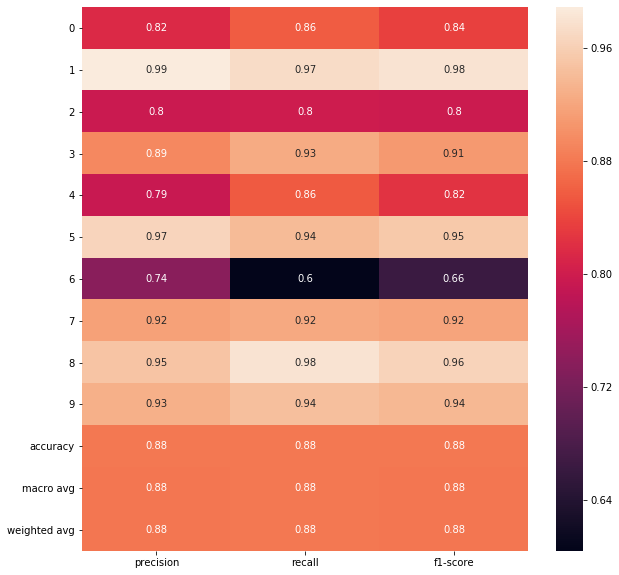

In [36]:
# Creating the confusion matrix:
clf_report = classification_report(y_final_test, y_final_pred, output_dict=True)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, ax=ax)